Some initial data inspection and studies.

In [1]:
from my_utils import my_utils
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LifeExpectancyAtBirth():
    def __init__(self):
        self.og = my_utils.get_data('lifeExpectancyAtBirth').rename({'First Tooltip': 'lifeExpectancy'}, axis=1)
        remaing_cols = ['Location', 'lifeExpectancy']
        self.both2019 = self.og.loc[(self.og['Period'] == 2019) & (self.og['Dim1'] == 'Both sexes'), remaing_cols]
        self.m2019 = self.og.loc[(self.og['Period'] == 2019) & (self.og['Dim1'] == 'Male'), remaing_cols]
        self.f2019 = self.og.loc[(self.og['Period'] == 2019) & (self.og['Dim1'] == 'Female'), remaing_cols]
        self.both2015 = self.og.loc[(self.og['Period'] == 2015) & (self.og['Dim1'] == 'Both sexes'), remaing_cols]
        self.both2010 = self.og.loc[(self.og['Period'] == 2010) & (self.og['Dim1'] == 'Both sexes'), remaing_cols]

dfclass = LifeExpectancyAtBirth()

In [3]:
dfyears = my_utils.df_difference(dfclass.both2019, dfclass.both2010, 'lifeExpectancy', cols=['lifeExpectancy'], set_index='Location')
dfyears.sort_values('Diff', ascending=False)

,Location,lifeExpectancy,Diff
71,Haiti,31.28,32.77
55,Eswatini,47.43,10.30
181,Zimbabwe,51.49,9.19
99,Malawi,56.80,8.82
151,South Africa,57.14,8.11
...,...,...,...
155,Suriname,71.83,-0.35
177,Venezuela (Bolivarian Republic of),74.79,-0.84
137,Saint Lucia,75.20,-0.87
179,Yemen,67.70,-1.07


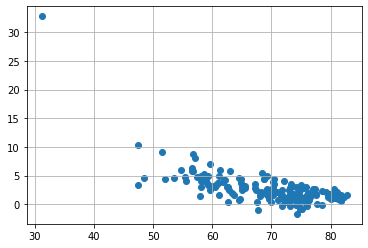

In [4]:
plt.scatter(dfyears['lifeExpectancy'], dfyears['Diff'])
plt.grid(True)
plt.show()

In [5]:
dfgender = my_utils.df_difference(dfclass.f2019, dfclass.m2019, 'lifeExpectancy', cols=['lifeExpectancy'], set_index='Location')
dfgender.sort_values('Diff', ascending=False)

,Location,lifeExpectancy,Diff
14,Belarus,69.65,9.97
55,Eswatini,53.36,9.82
135,Russian Federation,68.18,9.82
170,Ukraine,68.00,9.81
91,Latvia,70.58,9.26
...,...,...,...
71,Haiti,63.34,1.42
102,Mali,62.20,1.20
104,Mauritania,68.08,0.65
0,Afghanistan,63.29,-0.13


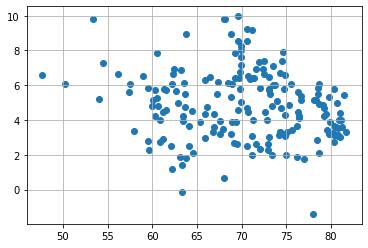

In [6]:
plt.scatter(dfgender['lifeExpectancy'], dfgender['Diff'])
plt.grid(True)
plt.show()

In [7]:
dfnew = my_utils.get_data('lifeExpectancyAtBirth')
#dfnew[dfnew['Period'] == 2015]
'Both sexes' in set(dfnew['Dim1'])

True